In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
u_data = xr.open_dataset("/Users/lgiunti/Downloads/gulfTaranto_20141005_REFERENCE/data/data00/outdata/ocean/SURF_1h_20141008_20141008_grid_U.nc")
v_data = xr.open_dataset("/Users/lgiunti/Downloads/gulfTaranto_20141005_REFERENCE/data/data00/outdata/ocean/SURF_1h_20141008_20141008_grid_V.nc")
t_data = xr.open_dataset("/Users/lgiunti/Downloads/gulfTaranto_20141005_REFERENCE/data/data00/outdata/ocean/SURF_1h_20141008_20141008_grid_T.nc")

In [3]:
u_data = u_data.vozocrtx
v_data = v_data.vomecrty
lon_T = t_data.nav_lon
lat_T = t_data.nav_lat

In [4]:
u_data = u_data.interp(
    {'x': lon_T, 'y': lat_T},
    method='linear'
)

v_data = v_data.interp(
    {'x': lon_T, 'y': lat_T},
    method='linear'
)

In [5]:
t = 0
z = 0
u_data = u_data[t, z, ...].values
v_data = v_data[t, z, ...].values
magnitude = (u_data ** 2 + v_data ** 2) ** 0.5

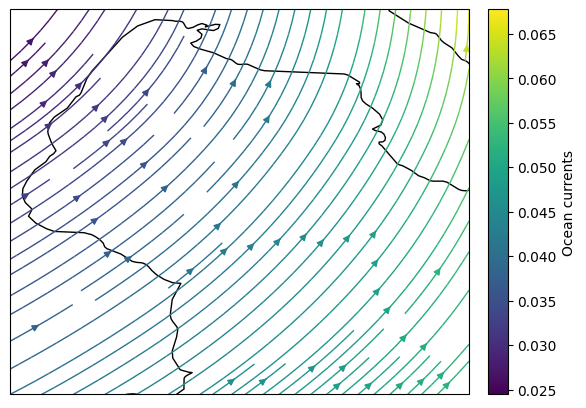

In [8]:
fig = plt.figure(figsize=(10, 5))
projection = ccrs.PlateCarree()

ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([lon_T.min(), lon_T.max(), lat_T.min(), lat_T.max()], crs=projection)
ax.coastlines()

cmap = cm.viridis 
norm = mcolors.Normalize(vmin=magnitude.min(), vmax=magnitude.max())

# Streamplot with colormap
ax.streamplot(lon_T, lat_T, u_data, v_data,
              linewidth=1, density=1, color=magnitude, cmap=cmap, norm=norm)

# Add colorbar
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', pad=0.025)
cbar.set_label('Ocean currents')